# Исследование объявлений о продаже квартир
**Поставленная задача** 

Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.


**Цель исследования** - дать ответы на вопросы:

- Сколько времени требуется для продажи объекта? Какой срок можно назвать быстрым или длительным?
- Какие факторы больше всего влияют на общую (полную) стоимость объекта? Найти зависимости.
- Какая средняя стоимость квартиры в 10 населённых пунктах с наибольшим числом объявлений?
- Как влияет на стоимость квартиры ее удаленность от центра Санкт-Петербурга за каждый километр? Вычислить среднюю стоимость каждого километра.

**Ход исследования**

Исследование содержит следующие этапы:
- Обзор данных
- Предобработка данных
- Подготовка таблицы к анализу
- Исследовательский анализ данных
- Общий вывод


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично
    
Молодец, что в начале проекте знакомишь с ним, так работа приобретает структуру и лучше воспринимается.
    
А оглавление из плагина TOC можно перенести, установив галочку "Add Notebook Toc Cell"
    
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Спасибо, сделано

</div>

### 1. Обзор данных 

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера v_1
Рекомендация

Все, используемые в проекте библиотеки, следует импортировать в отдельной ячейке
    
И в начале работы, а не по ходу выполнения проекта
</div>

In [2]:
#Импортируем данные 
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/home/evgeniya/Документы/Python/2/real_estate_data.csv', sep='\t')

<div class="alert alert-block alert-info">

### Комментарий студента: 
    
    Исправлено. Загрузка датасета перенесена в отдельную ячейку.

</div>

In [3]:
#задаем необходимые для работы параметры отображения
sns.set()
pd.set_option('display.max_rows', None)

In [4]:
data.info() #оценка общих данных о датафреме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor`— этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении


*Данные требуют изменения своих типов. Этим мы займемся в предобработке*

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

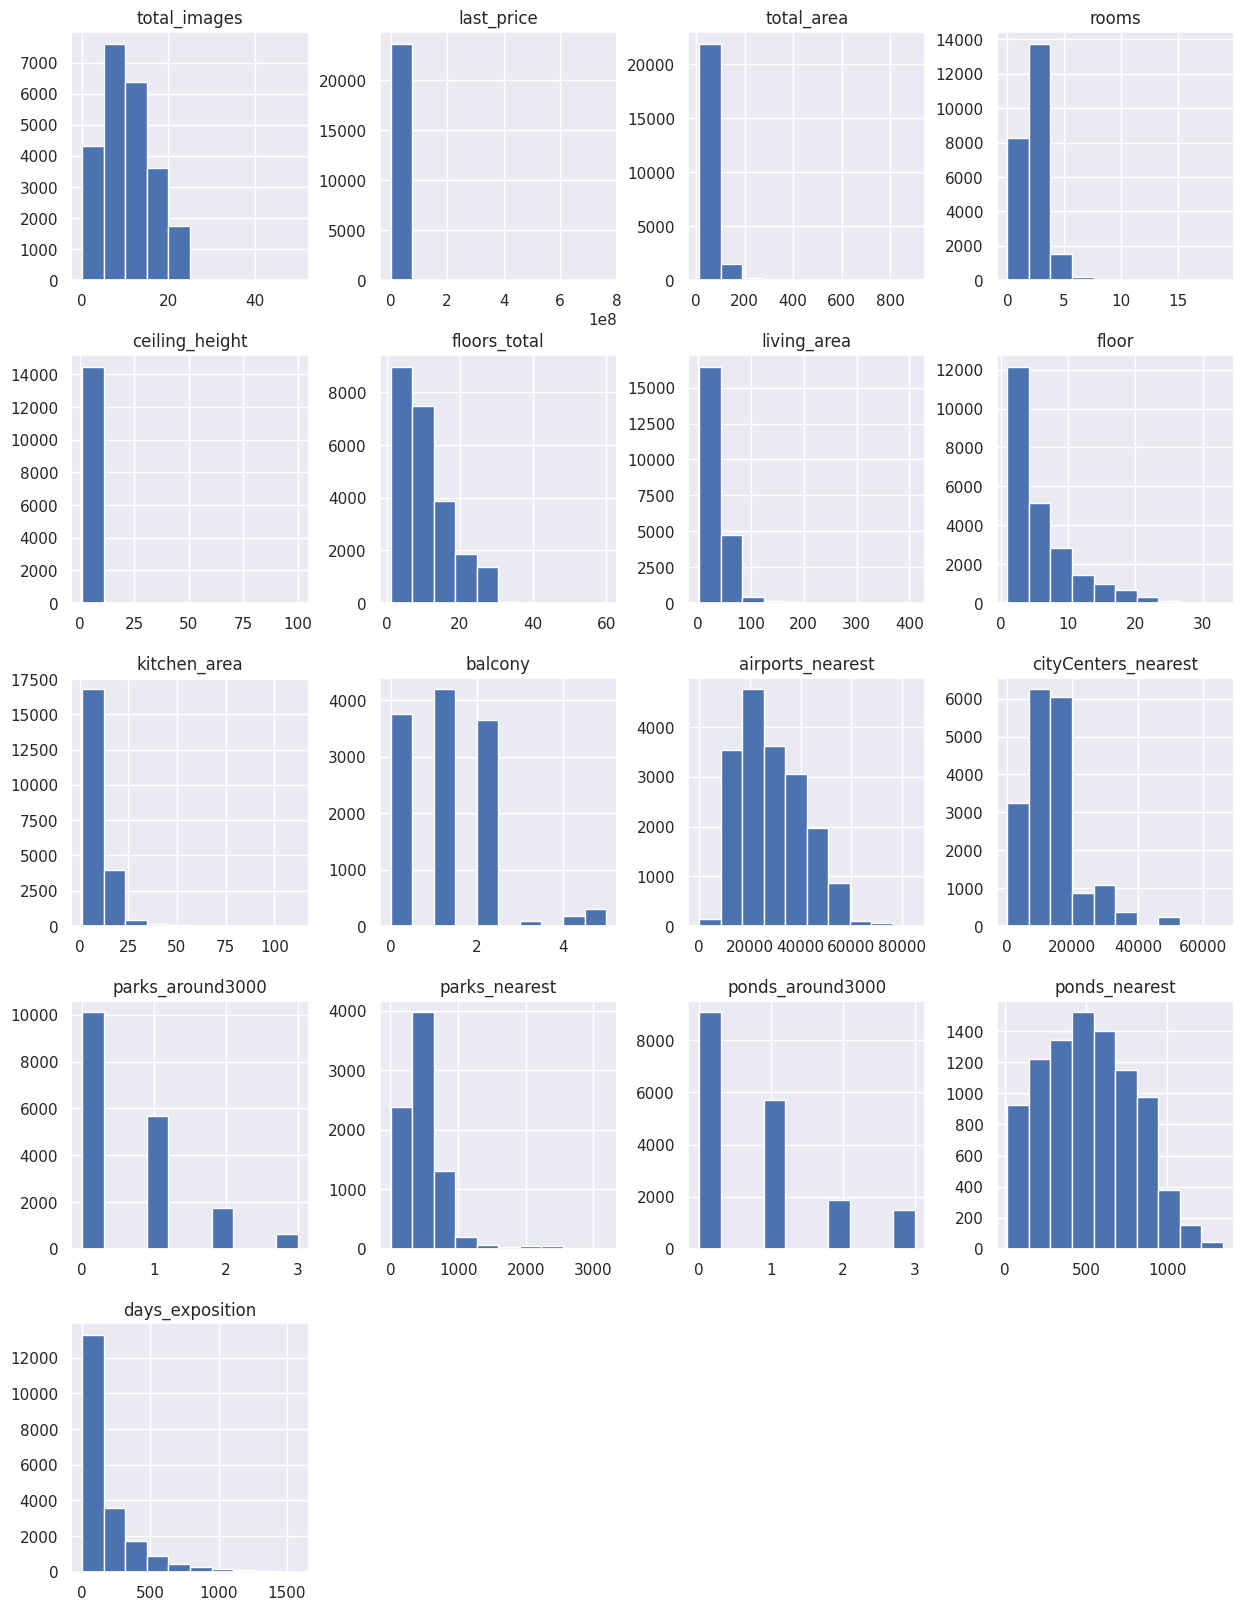

In [5]:
data.hist(figsize=(15, 20)) #строим общую гистограмму

<div class="alert alert-block alert-warning">
    
### Комментарий от ревьюера v_1
Рекомендация

Ты загружаешь данные, даже строешь гистограммы, но никак это не комментируешь
    
Стоит добавить небольшой вывод о распределении исследуемых данных
</div>

**Вывод**

Судя по сроку активности объявлений, то большая часть объектов реализуется за 100 дней.

В данных преобладают объекты с площадью до 50 кв.м., расположенные до 5го этажа. В основном 3-4х комнатные объекты с 2 балконами. Явное описание хрущевок и сталинок, которые преобладают в Санкт-Петербурге. 

В целом в городе часто можно встретить парковые зоны, о чем нам и говорят графики. Чаще всего от объекта парк может находиться в пределах 500 метров.

**Есть данные, которые заполнены неккореткно или пропущены:**
- Комнаты с нулевым значением скорее всего являют собой студии.
- У многих объектов не указана площадь кухни и не выделена жилая площадь, скорее всего собственник ограничился информацией об общей площади, а эти поля пропустил. 


<div class="alert alert-block alert-info">

### Комментарий студента: 
    
    Исправлено. Вывод добавлен.

</div>

### 2. Предобработка данных

In [6]:
data_start = len(data) #объем данных до предобработки
data_start

23699

Переименуем столбцы в соответсвии с 'best practices':

In [7]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

👍🏻
    
</div>

In [8]:
data.duplicated().sum() #поиск явных дубликатов

0

Явных дубликатов нет. Неявными займемся позже.

#### 1. Работа с типами данных 

Для начала преобразуем данные автоматически. Пандас более детально рассмотрит типы данных  и приведет их в лучший вид.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Это интересное решение, но я бы не рекомендовал так делать во избежании неожиданных ошибок
    
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Спасибо, учту в будущем

</div>

In [9]:
#автоматическое преобразование данных в лучшие типы
data = data.convert_dtypes() 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  Int64  
 1   last_price            23699 non-null  Int64  
 2   total_area            23699 non-null  Float64
 3   first_day_exposition  23699 non-null  string 
 4   rooms                 23699 non-null  Int64  
 5   ceiling_height        14504 non-null  Float64
 6   floors_total          23613 non-null  Int64  
 7   living_area           21796 non-null  Float64
 8   floor                 23699 non-null  Int64  
 9   is_apartment          2775 non-null   boolean
 10  studio                23699 non-null  boolean
 11  open_plan             23699 non-null  boolean
 12  kitchen_area          21421 non-null  Float64
 13  balcony               12180 non-null  Int64  
 14  locality_name         23650 non-null  string 
 15  airports_nearest   

Столбец `first_day_exposition` требует ручного изменения в тип даты для удобства в дальнейшей работе, а столбец `days_exposition` в формат `Int64`. 

`days_exposition` будем округлять число в меньшуюю сторону, так как нам нужно понимать сколько целых дней было активно объявление до снятия с публикации.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [11]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [12]:
#проверяем результат изменения типов данных
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  Int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  Float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  Int64         
 5   ceiling_height        14504 non-null  Float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  Float64       
 8   floor                 23699 non-null  Int64         
 9   is_apartment          2775 non-null   boolean       
 10  studio                23699 non-null  boolean       
 11  open_plan             23699 non-null  boolean       
 12  kitchen_area          21421 non-null  Float64       
 13  balcony         

Все данные приведены к соответствующим типам. 

#### 2. Обработка пропущенных значений


Проверим пропущенные значения по всей таблице данных.

In [13]:
data.isna().mean() * 100 #информация о пропусках в процентном соотношении

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Пропуски `floors_total` и `locality_name` в совокупности представляют собой менее 1% данных, который не повлияет на результат исследования. Потому мы можем удалить их из датасета.  

`days_exposition` 13,4 % - допускается вероятность, что на момент сбора данных объявления еще были активны. Проверяем.

In [14]:
display(
    data['first_day_exposition'].max(), #узнаем самую "свежую" дату объявления в датасете
    data['first_day_exposition'].min()  #узнаем самую раннюю дату 
)

Timestamp('2019-05-03 00:00:00')

Timestamp('2014-11-27 00:00:00')

Строим график зависимости между сроком активности объявления и даты его публикации.

<AxesSubplot:xlabel='days_exposition'>

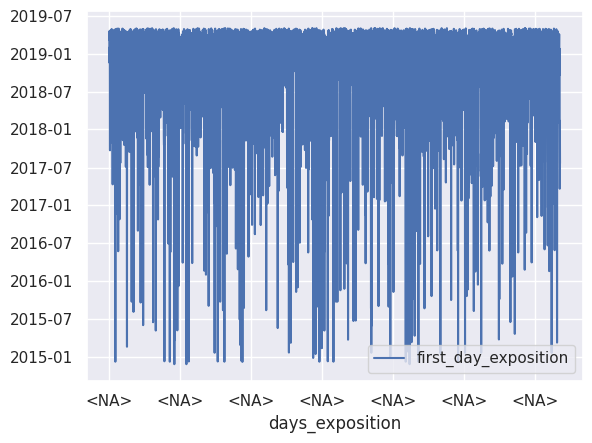

In [15]:
data[data['days_exposition'].isna()].plot(x='days_exposition', y='first_day_exposition')


Есть объявления, которые активны с начала 2015 года, но больше всего объявлений опубликовано между началом 2018 и началом 2019. Т.е. объявление может быть актуально. Оставляем данные в столбце `days_exposition` с пропущенными значениями.

In [16]:
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

In [17]:
data.isna().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.548695
floors_total             0.000000
living_area              7.914280
floor                    0.000000
is_apartment            88.287715
studio                   0.000000
open_plan                0.000000
kitchen_area             9.429238
balcony                 48.695099
locality_name            0.000000
airports_nearest        23.441545
city_centers_nearest    23.343942
parks_around3000        23.339699
parks_nearest           65.924040
ponds_around3000        23.339699
ponds_nearest           61.654997
days_exposition         13.456397
dtype: float64

Наиболее очевидные пропуски в столбцах `is_apartment` , `balcony`, `parks_around3000`, `ponds_around3000`. Скорее всего при заполнении объявления был пропущен этот пункт, так как объект объявления не имеет данную характеристику. 

Заменяем пропуски на `0` или `False` по смыслу.

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


Оставшиеся пропуски в датасете и идеи их заполнения: 


* `ceiling_height` 38% - данный параметр важен для анализа, заполним пропуски медианой

* `living_area` 8% - данный параметр некритичный, скорее всего собственник не указал информацию, оставляем пропуски

* `kitchen_area` 9,6% - данный параметр некритичен, по умолчанию во всех объектах есть кухня, допустим, собственник просто не указал эту информацию, оставляем пропуски

* `airports_nearest` 23%, `city_сenters_nearest` 23%, `parks_nearest` 65% - не расположены данные локации около объекта, оставляем пропуски 


Заполняем пропуски в столбце `ceiling_height`. Возможно, собственик не стал замерять высоту потолков, так как в объявлении были исчерпывающие фотографии. 

Необходимо заполнить каждый пропуск медианным значением. 

In [19]:
data['ceiling_height'].median() #медианное значение высоты потолков

2.65

Заполняем все пропущенные данные медианой.

In [20]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Все необходимые пропущенные значения для исследования обработаны.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Отлично
    
Отличная работа с пропусками, молодец, что ничего не упускаешь и обосновываешь логику своих действий 👍🏻
    
А заполнять или нет - решать тебе  
    
Но есть и замечание
</div>

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично

Гипотеза о том, что объявление еще активно верна (Ее можно проверить, построив гистограмму по дате размещения для пропущенных значений данного столбца)
    
Но это не значит, что эти данные следует удалять.
</div>
    

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Исправлено. Выборка представлна за период с 27.11.2014 по 01.05.2019 гг. Это не было мной учтено ранее.
    В связи с этим, построила гистограмму по вашему предложению и сделала вывод:
    Есть объявления, которые активны с начала 2015 года, но больше всего объявлений опубликовано между началом 2018 и началом 2019. Т.е. объявление может быть актуально. Оставляем данные в столбце `days_exposition` с пропущенными значениями.

</div>

#### 3. Обработка неявных дубликатов 

Обработаем на предмет неявных дубликатов столбец `locality_name`. 

In [21]:
display((data['locality_name'].value_counts(normalize=True) * 100).head(10))
len(data['locality_name'].unique())

Санкт-Петербург      66.416295
посёлок Мурино        2.206662
посёлок Шушары        1.862932
Всеволожск            1.688945
Пушкин                1.565882
Колпино               1.434331
посёлок Парголово     1.387651
Гатчина                1.30278
деревня Кудрово       1.268831
Выборг                1.005729
Name: locality_name, dtype: Float64

364

В столбце `locality_name` 330 уникальных значений. 

Шаги обработки неявных данных: 
* приведем все названия населенных пунктов к нижнему регистру

* заменим все "ё" на "е"

* названия без принадлежности к категории населеных пунктов объединим с уже имеющимися (Мурино => поселок мурино)

* меняем "городской поселок" на "поселок городского типа"

In [22]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [23]:
display((data['locality_name'].value_counts(normalize=True) * 100).head(10))
len(data['locality_name'].unique())

санкт-петербург      66.416295
поселок мурино        2.342457
поселок шушары        1.862932
всеволожск            1.688945
пушкин                1.565882
колпино               1.434331
поселок парголово     1.387651
гатчина                1.30278
деревня кудрово       1.268831
выборг                1.005729
Name: locality_name, dtype: Float64

323

Часть неявных дубликатов мы сократили. Уникальных данных стало `294` вместо `330`. 

Так как у нас нет точного адреса объекта и мы не можем проверить действительно ли в данных подразумевается, что «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов или они всё же относятся к разным локациям, то мы просто верим описанию данных.

Итог: переименовываем похожие названия под один населенный пункт.

Фильтруем названия населенных пунктов с помощью списка. Один список будет иметь названия в составе которых присутствует пробел, другой, где название однословное. 

Затем, мы сверяем списки, если есть совпадения, то из однословного списка удаляем название. 
Далее в датафрейме мы переименовываем названия, опираясь на результат сверки списков.

In [24]:
#создаем список уникальных названий населенных пунктов
sp_name = list(pd.Series([str(i) for i in data['locality_name']]).unique()) 

#разделяем названия по условиям по спискам
sp_name_space = [i for i in sp_name if ' ' in i] #названия более одного слова
sp_name_not_space = [i for i in sp_name if ' ' not in i] #однословные названия

#создаем списки, которые будут содержать названия в формате двух слов и однословного
sp_short = []
sp_long = []

#пишем цикл, который отбирает дублируемые названия
#разделяем названия в разные списки по количеству слов
for i in sp_name_space:
    for j in sp_name_not_space:
        if j in i:
            sp_short.append(j)
            sp_long.append(i)

display(sp_short, sp_long)

['мурино',
 'кудрово',
 'луга',
 'никольское',
 'высоцк',
 'кингисепп',
 'коммунар',
 'любань']

['поселок мурино',
 'деревня кудрово',
 'поселок усть-луга',
 'село никольское',
 'село русско-высоцкое',
 'поселок кингисеппский',
 'поселок коммунары',
 'поселок любань']

Значений оказалось не так много. Меняем их в датасете. 

In [25]:
data = data.replace({'locality_name' : 
              {'мурино' : 'поселок мурино',
               'кудрово' : 'деревня кудрово',
               'никольское' : 'село никольское',
               'кингисепп' : 'поселок кингисеппский',
               'коммунар' : 'поселок коммунары',
               'любань' : 'поселок любань'}   
            })

Неявные дубликаты обработаны

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1

Интересное решение 👍🏻
    
</div>

#### 4. Обработка аномальных значений

Проверим на предмет аномальных значений данные в столбцах:
- `last_price`
- `ceiling_height`
- `floors_total`
- `floor`
- `total_area`
- `balcony`
- `rooms`
- `days_exposition`

С помощью графика "ящика с усами" подсветим аномальные значения.

<AxesSubplot:>

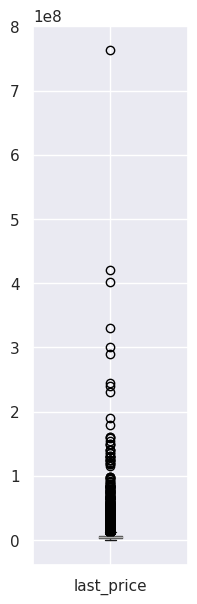

In [26]:
display(data.boxplot(column=['last_price'], figsize = (2, 7)))


<AxesSubplot:>

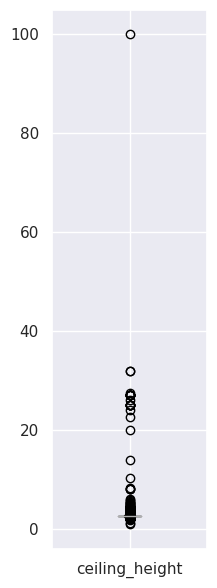

In [27]:
display(data.boxplot(column=['ceiling_height'], figsize = (2, 7)))

<AxesSubplot:>

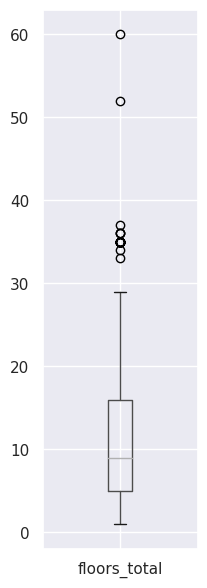

In [28]:
data.boxplot(column=['floors_total'], figsize = (2, 7))

<AxesSubplot:>

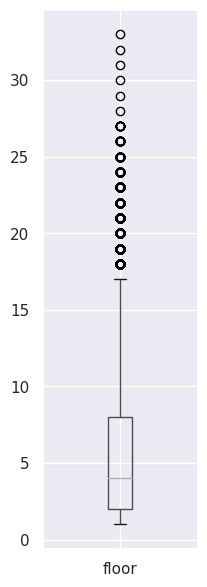

In [29]:
data.boxplot(column=['floor'], figsize = (2, 7))

<AxesSubplot:>

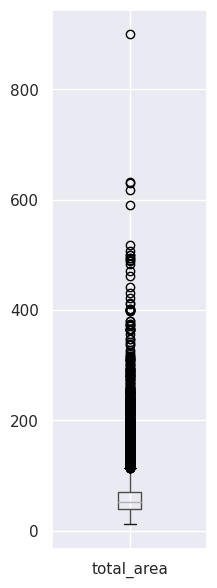

In [30]:
data.boxplot(column=['total_area'], figsize = (2, 7))

<AxesSubplot:>

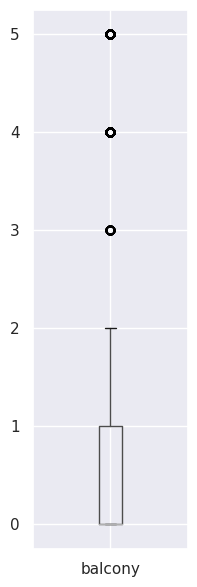

In [31]:
data.boxplot(column=['balcony'], figsize = (2, 7))

<AxesSubplot:>

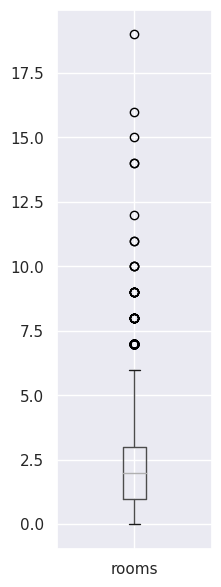

In [32]:
display(data.boxplot(column=['rooms'], figsize = (2, 7)))

По графику ящика с усами видим, что аномальные значения есть. Используем квантили, чтобы от них избавиться.

In [33]:
q = data['last_price'].quantile(0.99)
q2 = data['ceiling_height'].quantile(0.99)
q3 = data['floors_total'].quantile(0.99)
q4 = data['floor'].quantile(0.99)
q5 = data['total_area'].quantile(0.99)
q6 = data['balcony'].quantile(0.99)
q7 = data['rooms'].quantile(0.99)
q8 = data['days_exposition'].quantile(0.99)

data = data[data['last_price'] < q]
data = data[data['ceiling_height'] < q2]
data = data[data['floors_total'] < q3]
data = data[data['floor'] < q4]
data = data[data['total_area'] < q5]
data = data[data['balcony']< q6]
data = data[data['rooms'] < q7]
data = data[data['days_exposition'] < q8]

Аномальные значения удалены.



##### **Вывод**

In [34]:
#подсчитываем насколько уменьшились данные после предобработки
display(
     data_start - len(data),
    (data_start - len(data)) / len(data) * 100
)

4839

25.65747613997879

Предобработка завершена.

Были удалены дубликаты, неявные дубликаты, выбросы и изменены значения на корректные при детальном рассмотрении. В итоге датасет уменьшился на 25,6% от своего начального размера.

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера v_1
Рекомендация
    
В целом корректная чистка, но не совсем ясно по какому принципу определяешь границы аномалий и почему решаешь не брать аномалии в количестве комнат и общей площади
    
Рекомендую почистить с помощью квантилей, убрать все, что выше 99-го. Так ты избавишься от явных выбросов и не удалишь слишком много данных
</div>

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично

И чистка данных не должна идти последовательно. Сначала исследуешь ключевые данные на выбросы, по каждым из них определяешь границы аномалий, а потом чистишь. Иначе ты просто не узнаешь, что было в других данные, которые уже удалены
    

</div>
    

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Исправлено
</div>

### 3. Подготовка таблицы к анализу

В подговке таблице к дальнейшему анализу добавим ей следующие столбцы данных:
- `cost_per_sqm`             цена одного квадратного метра    
- `day_publication`      день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- `month_publication`    месяц публикации объявления
- `year_publication`     год публикации объявления
- `floor_type`           тип этажа квартиры (значения — «‎первый», «последний», «другой»)
- `city_center_km` расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [35]:
#цена одного квадратного метра
data['cost_per_sqm'] = data['last_price'] / data['total_area']

In [36]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_publication'] = data['first_day_exposition'].dt.dayofweek

In [37]:
#месяц публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month

In [38]:
#год публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year

In [39]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
data['floor_type'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1)

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично

В данном расчете ошибка, проверь таким кодом
    
    data['floor_type'].value_counts()
        
</div>    

In [40]:
data['floor_type'].value_counts()

другой       13971
последний     2542
первый        2347
Name: floor_type, dtype: int64


<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Исправлено. Вроде. Функция не всегда работает исправно(

</div>

In [41]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['city_center_km'] = data['city_centers_nearest'] / 1000
data['city_center_km'] = data['city_center_km'].apply(np.rint)
data['city_center_km'] = data['city_center_km'].fillna(value=0).astype(int)

С помощью автоматического улучшего данных меняем типы данных и проверяем результат.

In [42]:
data = data.convert_dtypes() 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18860 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18860 non-null  Int64         
 1   last_price            18860 non-null  Int64         
 2   total_area            18860 non-null  Float64       
 3   first_day_exposition  18860 non-null  datetime64[ns]
 4   rooms                 18860 non-null  Int64         
 5   ceiling_height        18860 non-null  Float64       
 6   floors_total          18860 non-null  Int64         
 7   living_area           17320 non-null  Float64       
 8   floor                 18860 non-null  Int64         
 9   is_apartment          18860 non-null  boolean       
 10  studio                18860 non-null  boolean       
 11  open_plan             18860 non-null  boolean       
 12  kitchen_area          16981 non-null  Float64       
 13  balcony         

In [43]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,day_publication,month_publication,year_publication,floor_type,city_center_km
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,<NA>,0,<NA>,81,82920.792079,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90,2,574,558,92785.714286,3,8,2015,другой,14
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,100000.0,1,6,2018,другой,8
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,<NA>,0,<NA>,55,95065.789474,0,9,2018,другой,0
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,...,<NA>,0,<NA>,289,88524.590164,6,2,2017,другой,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310,2,553,137,127525.252525,3,11,2017,другой,14
11,9,3300000,44.0,2018-08-27,2,2.65,5,31.0,4,False,...,<NA>,0,<NA>,7,75000.0,0,8,2018,другой,52
12,10,3890000,54.0,2016-06-30,2,2.65,5,30.0,5,False,...,<NA>,0,<NA>,90,72037.037037,3,6,2016,последний,0
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,294,3,298,366,82943.925234,5,7,2017,последний,33
14,1,4400000,36.0,2016-06-23,1,2.65,6,17.0,1,False,...,<NA>,1,96,203,122222.222222,3,6,2016,первый,31


Подготовка таблицы к дальнейшему анализу завершена.

<div class="alert alert-block alert-success">
    
### Комментарий от ревьюера v_1
Отлично
    
Отлично, все расчеты верны (кроме типа этажа)
    
И расстояние округлять не надо вниз, есть математическое округление
</div>

<div class="alert alert-block alert-info">

### Комментарий студента: 
    
    Исправлено с np.ceil() на np.rint()

</div>

### 4. Исследовательский анализ данных

#### 1. Исследование параметров объекта

Изучим параметры квартир: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

count    1.886000e+04
mean     5.341837e+06
std      3.619761e+06
min      4.300000e+05
25%      3.330000e+06
50%      4.400000e+06
75%      6.200000e+06
max      3.590000e+07
Name: last_price, dtype: float64

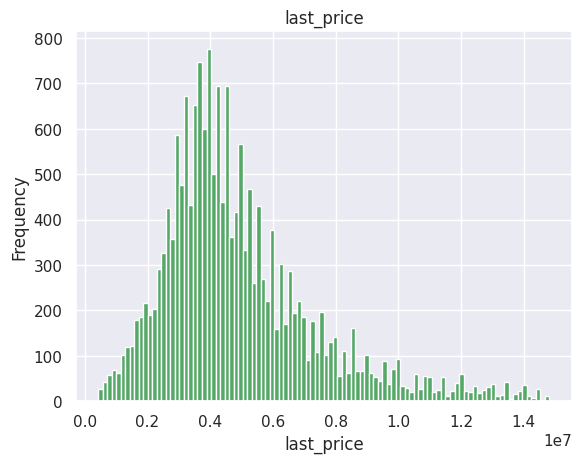

Возможные выбросы значений: last_price = 35900000.0


count     18860.000000
mean      95045.920767
std       34565.799178
min        7962.962963
25%       75717.083178
50%       93420.907672
75%      111047.356443
max      640422.350472
Name: cost_per_sqm, dtype: float64

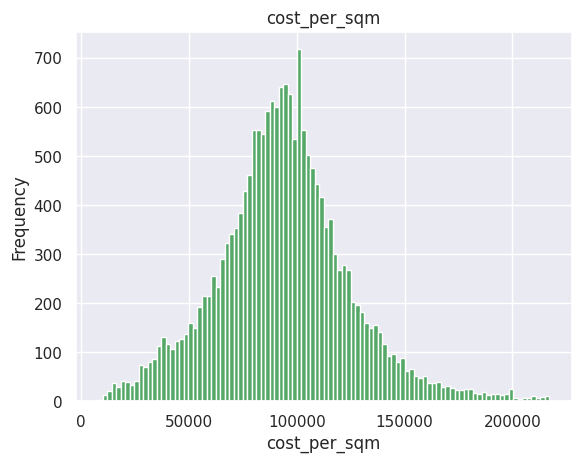

Возможные выбросы значений: cost_per_sqm = 640422.3504721931


count    18860.000000
mean        54.964844
std         22.282913
min         12.000000
25%         39.000000
50%         50.000000
75%         65.000000
max        197.000000
Name: total_area, dtype: float64

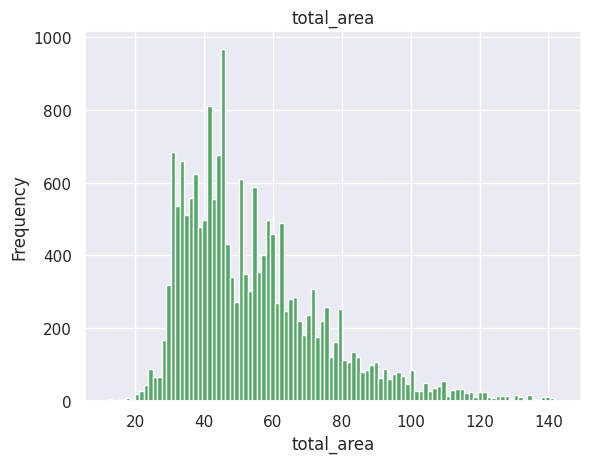

Возможные выбросы значений: total_area = 197.0


count    18860.000000
mean        10.604136
std          6.286944
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         25.000000
Name: floors_total, dtype: float64

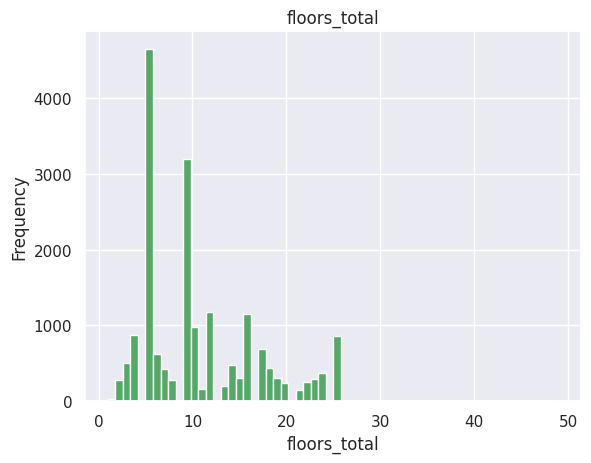

Возможные выбросы значений: floors_total = 25.0


count    18860.000000
mean         0.543054
std          0.821333
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: balcony, dtype: float64

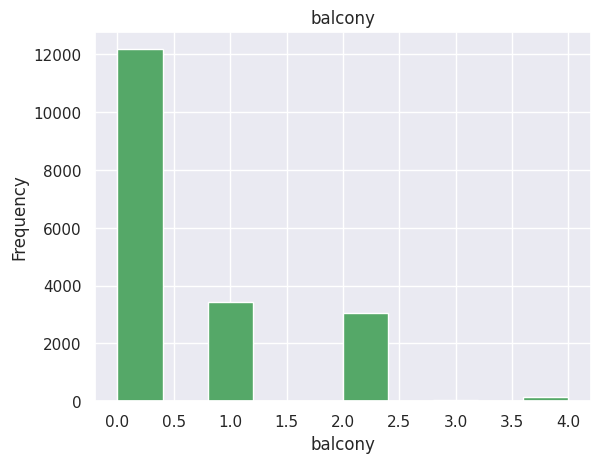

Возможные выбросы значений: balcony = 4.0


count    17320.000000
mean        31.316044
std         14.737554
min          2.000000
25%         18.100000
50%         29.400000
75%         40.000000
max        140.000000
Name: living_area, dtype: float64

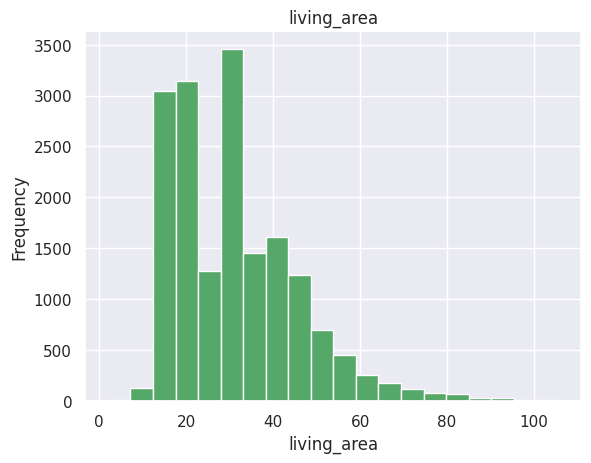

Возможные выбросы значений: living_area = 140.0


count    14413.000000
mean     28753.561368
std      12719.861121
min          0.000000
25%      18163.000000
50%      26995.000000
75%      37407.000000
max      84006.000000
Name: airports_nearest, dtype: float64

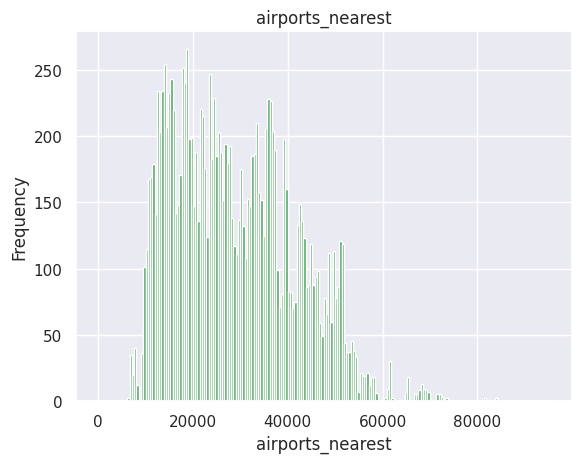

Возможные выбросы значений: airports_nearest = 84006.0


count    16981.000000
mean         9.980697
std          4.650696
min          2.000000
25%          7.000000
50%          9.000000
75%         11.300000
max         65.000000
Name: kitchen_area, dtype: float64

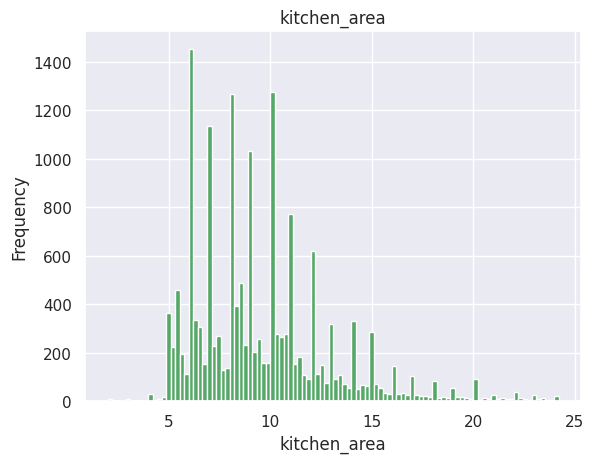

Возможные выбросы значений: kitchen_area = 65.0


count    18860.000000
mean         1.940297
std          0.896842
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

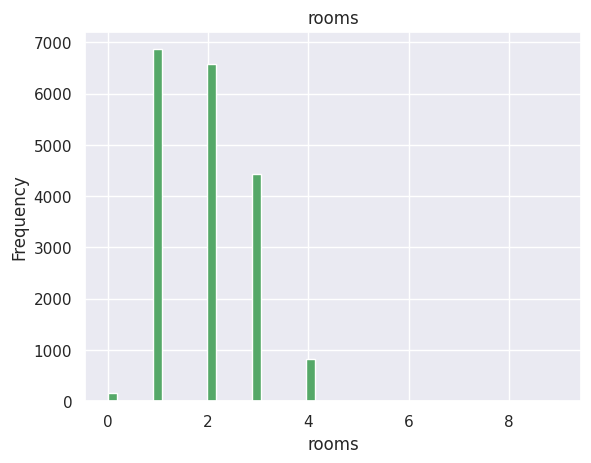

Возможные выбросы значений: rooms = 4.0


count    18860.000000
mean         5.720679
std          4.489818
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         22.000000
Name: floor, dtype: float64

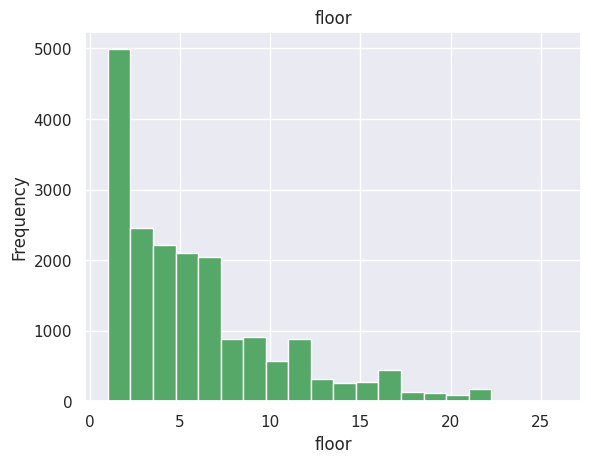

Возможные выбросы значений: floor = 22.0


count    14432.000000
mean     14553.683412
std       8536.014170
min        287.000000
25%       9922.000000
50%      13255.000000
75%      16351.750000
max      65105.000000
Name: city_centers_nearest, dtype: float64

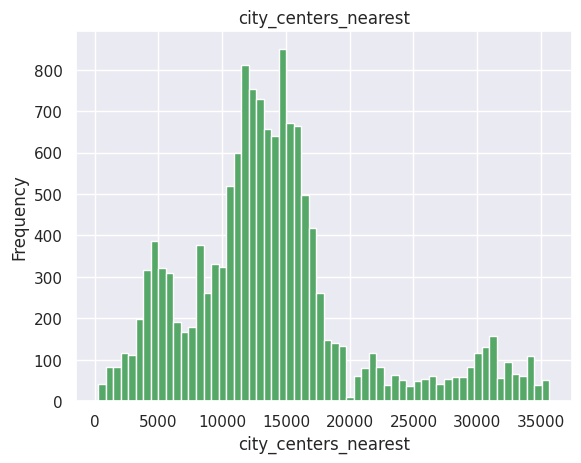

Возможные выбросы значений: city_centers_nearest = 65105.0


count    18860.000000
mean         0.447826
std          0.726421
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

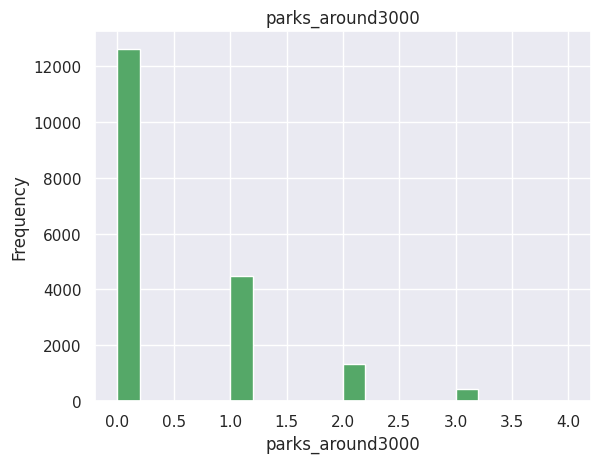

Возможные выбросы значений: parks_around3000 = 3.0


count    6243.000000
mean      491.480538
std       341.231852
min         1.000000
25%       288.000000
50%       455.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

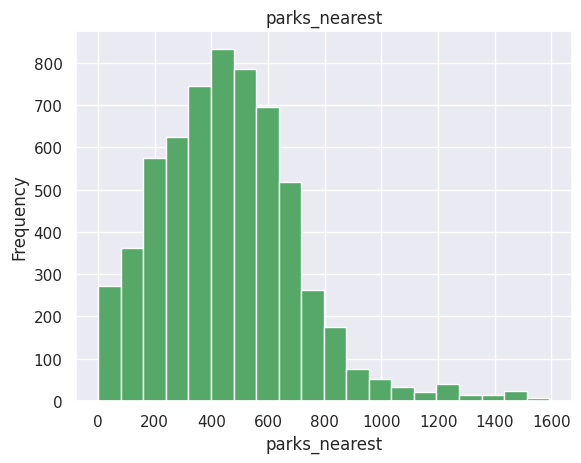

Возможные выбросы значений: parks_nearest = 3190.0


count    18860.000000
mean         0.564157
std          0.857260
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

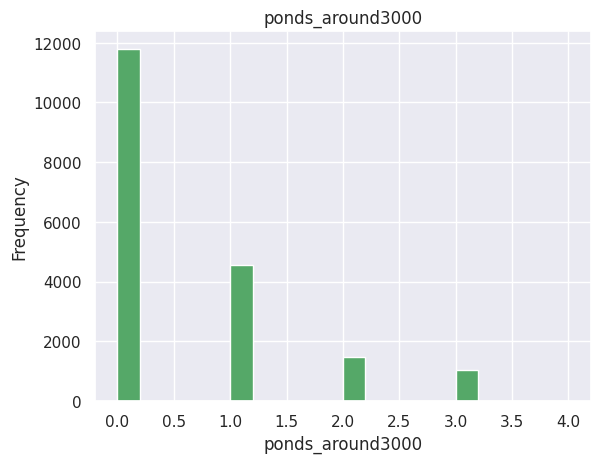

Возможные выбросы значений: ponds_around3000 = 3.0


count    7073.000000
mean      527.335784
std       276.072041
min        13.000000
25%       309.000000
50%       513.000000
75%       734.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

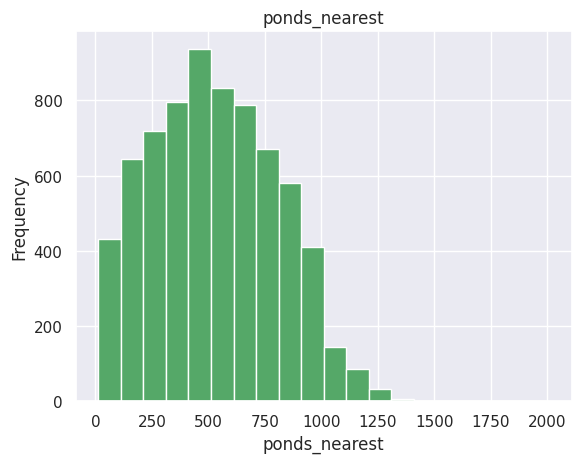

Возможные выбросы значений: ponds_nearest = 1344.0


count    18860.000000
mean         2.584040
std          1.785219
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_publication, dtype: float64

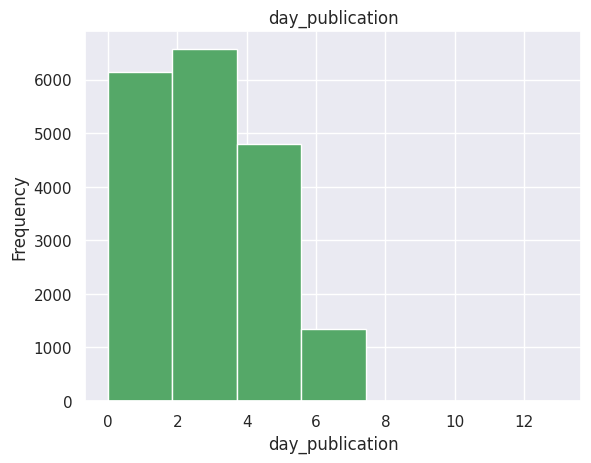

Возможные выбросы значений: day_publication = 6.0


count    18860.000000
mean         6.576882
std          3.486496
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

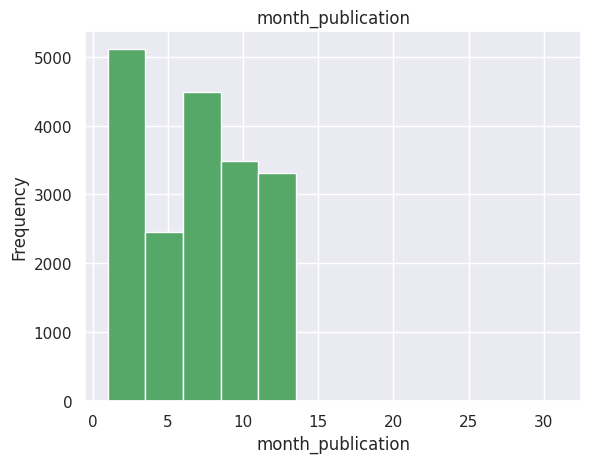

Возможные выбросы значений: month_publication = 12.0


count    18860.000000
mean      2017.252121
std          0.936166
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_publication, dtype: float64

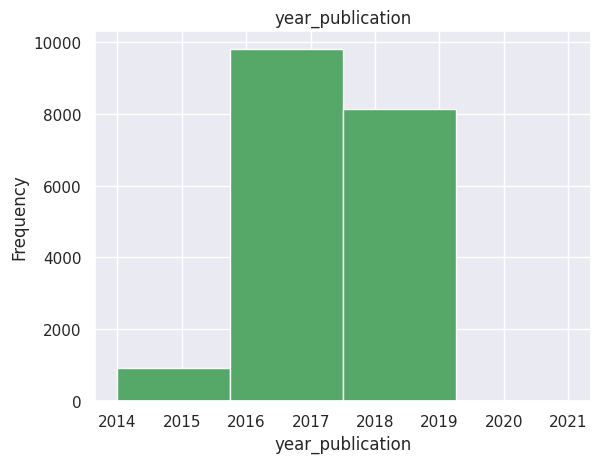

Возможные выбросы значений: year_publication = 2019.0


count    18860.000000
mean        11.131601
std          9.688503
min          0.000000
25%          2.000000
50%         12.000000
75%         15.000000
max         65.000000
Name: city_center_km, dtype: float64

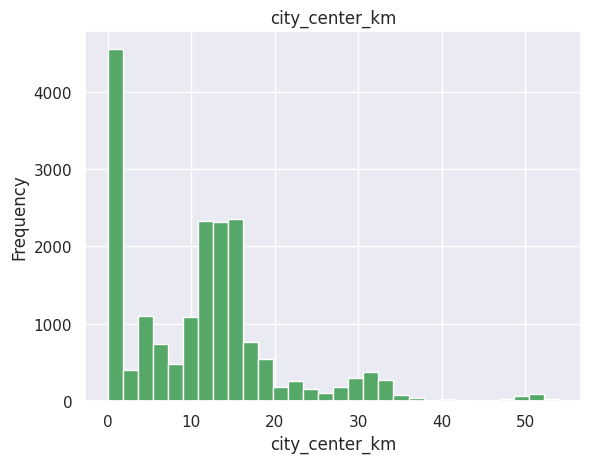

Возможные выбросы значений: city_center_km = 65.0


In [44]:
values_to_reserch = ['last_price', 'cost_per_sqm', 'total_area', 'floors_total', 'balcony',
                     'living_area', 'airports_nearest', 
                     'kitchen_area', 'rooms', 'floor', 'city_centers_nearest', 'parks_around3000', 
                     'parks_nearest', 'ponds_around3000', 'ponds_nearest', 
                     'day_publication', 'month_publication', 'year_publication','city_center_km']
bins_of_values_to_reserch = [100,100,100,60,10,20,200,100,50,20,60,20,20,20,20,7,12,4,30]
c = 0
for value in values_to_reserch:
    table_stats = data[value].describe()   
    display(table_stats)
    fig, ax = plt.subplots()
    data[value].plot(grid = True, kind = 'hist', color='g', bins=bins_of_values_to_reserch[c], range=(table_stats['min'],table_stats['75%']+(table_stats['75%']-table_stats['25%'])*3), title = value)
    ax.set_xlabel(value)
    plt.show()
    print('Возможные выбросы значений:', values_to_reserch[c],'=', table_stats['max'])
    c += 1

**Выводы**

После предобработки данные также продолжают подтверждать первичные выводы после обзора данных.

Выборка значений столбца `total_area` имеет выбросы, это видно по значению стандартного отклонения (оно далеко от ср.значения) и по тому, что ср.значение больше медианы. Максимальная площадь квартиры 460 кв. метров, - элитная недвижимость. Минимальная площадь в 12 квадратных метров допустима в современных реалиях.

Выборка значений столбца `last_price` имеет максимальное значение в 24 000 000, - в рамках нормы.

Выборка значений столбца `rooms` 0 это студии, 11 - элитная недвижимость. В рамках нормы.

Выборка значений столбца `ceiling_height` приведена в нормальное состояние. Минимум высоты потолков 2,5м. и максимум 3,5м.

Наибольшее количестве объявлений было опубликовано с 2016 по 2019. С 2014 по 2015 спад объясняется кризисом.

Наибольший пик объектов приходится на удаленность от центра города на 15 км. Это как раз территория спальных  районам, где плотная жилая застройка сталинками и хрущевками преимущественно.


<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично

Сами гистограммы отличные, но разобрана только часть данных
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Исправлено

</div>

#### 2. Анализ срока реализации объекта

При анализе не будем учитывать данные еще активных объявлений.

Создаем датасет без пропущенных значений в столбце срока реализации.

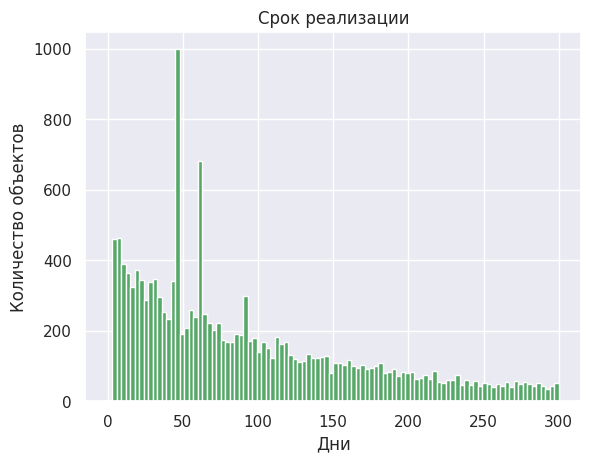

In [45]:
sale_data = data.dropna(subset=['days_exposition'])

#Строим гистограмму по соотношению количетва объектов и дней реализации
sale_data['days_exposition'].plot(grid = True, kind = 'hist', color='g',bins=100, range= (0,300))
plt.title('Cрок реализации')
plt.xlabel('Дни')
plt.ylabel('Количество объектов')
plt.show()


Как видим есть всплеск исполнения объявлений около 45-50, 60 и 95-100 дней. Скорее всего это настройки сервиса, которые предлагают размещение на бесплатной основе на 30 дней, а далее требуется объявление обновлять.

In [46]:
#Посчитаем средний срок продажи и медианный

print('Медиана срока реализации:', int(np.rint(sale_data['days_exposition'].median())))
print('Среднее срока реализации:', int(np.rint(sale_data['days_exposition'].mean())))
print('\nОбщая информация по сроку реализации')
sale_data['days_exposition'].describe()

Медиана срока реализации: 92
Среднее срока реализации: 168

Общая информация по сроку реализации


count    18860.000000
mean       167.583563
std        191.752551
min          1.000000
25%         44.000000
50%         92.000000
75%        218.000000
max       1067.000000
Name: days_exposition, dtype: float64

В среднем объекты по медиане продаются за срок до 100 дней. Есть объекты, которые были проданы за 1 день и есть объекты, которые ожидали продажи более 4х лет (1580 дней самая долгая продажа в выборке).

Быстрой продажей можно обозначить срок реализации 45 дней и менее. Длительная продажа - от 230 дней (~7,5 месяцев) и более.

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично

Зачем ты фильтруешь в коде по значению 9999?))
    
И код взять отсюда
    
http://ikunin.ru/analysis/spb_realestate_analyst/
    
Данный блок следует переделать самостоятельно
</div>

<div class="alert alert-block alert-info">

### Комментарий студента: 
    Уже устала после раздела предобработки и стала заимствовать код (( 
    
    Исправлено

</div>

#### 3. Поиск зависимостей, влияющих на стоимость объекта

Необходимо проанализировать какие факторы больше всего влияют на общую (полную) стоимость объекта.

Зависит ли ценфакторы больше всего влияют на общую (полную) стоимость объектафакторы больше всего влияют на общую (полную) стоимость объектаа от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

In [47]:
#Отобразим корреляционную матрицу
#Создадим новый датафрейм только с нужными нам столбцами
data_corr = data[['last_price', 'total_area', 'living_area',
                 'kitchen_area', 'rooms', 'floor',
                 'day_publication', 'month_publication', 'year_publication']].copy()

data_corr.corr() * 100 #для удобства восприятия умножим на 100

,last_price,total_area,living_area,kitchen_area,rooms,floor,day_publication,month_publication,year_publication
last_price,100.000000,76.287136,63.801748,57.546556,45.016760,10.322387,-0.998916,0.042575,-4.560990
total_area,76.287136,100.000000,91.389937,54.002196,77.249939,-0.050741,-1.358704,0.565407,-9.880647
living_area,63.801748,91.389937,100.000000,27.400736,86.733488,-9.762995,-0.887193,0.161359,-9.511487
kitchen_area,57.546556,54.002196,27.400736,100.000000,14.013263,18.811860,-1.124613,0.509208,-4.885694
rooms,45.016760,77.249939,86.733488,14.013263,100.000000,-15.002247,-0.825884,0.292644,-7.680438
floor,10.322387,-0.050741,-9.762995,18.811860,-15.002247,100.000000,0.872399,1.807509,1.752491
day_publication,-0.998916,-1.358704,-0.887193,-1.124613,-0.825884,0.872399,100.000000,0.801355,0.678616
month_publication,0.042575,0.565407,0.161359,0.509208,0.292644,1.807509,0.801355,100.000000,-20.433997
year_publication,-4.560990,-9.880647,-9.511487,-4.885694,-7.680438,1.752491,0.678616,-20.433997,100.000000


По матрице можно заметить, что большая зависимость есть у общей площади, жилой площади, кухни, комнат. Рост этих показателей влияет на рост общей стоиомсти объекта.
Остальные показатели достаточно низкие. Воспользуемся визуализацией.

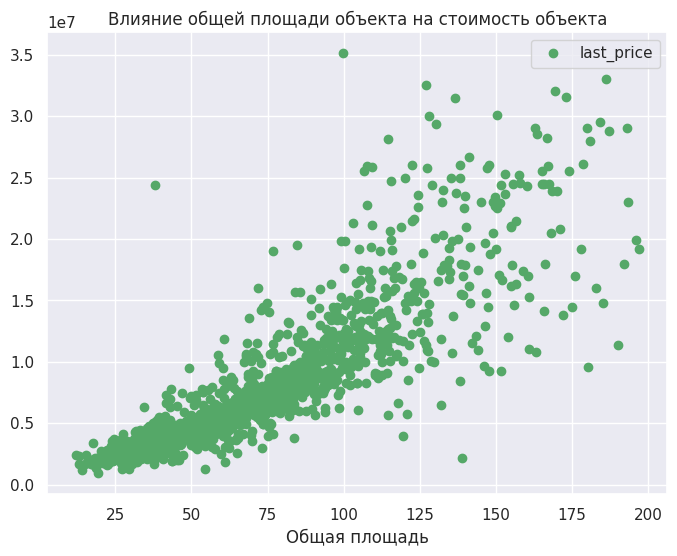

Корреляция цены объекта и общей площади:

            total_area  last_price
total_area    1.000000    0.762871
last_price    0.762871    1.000000


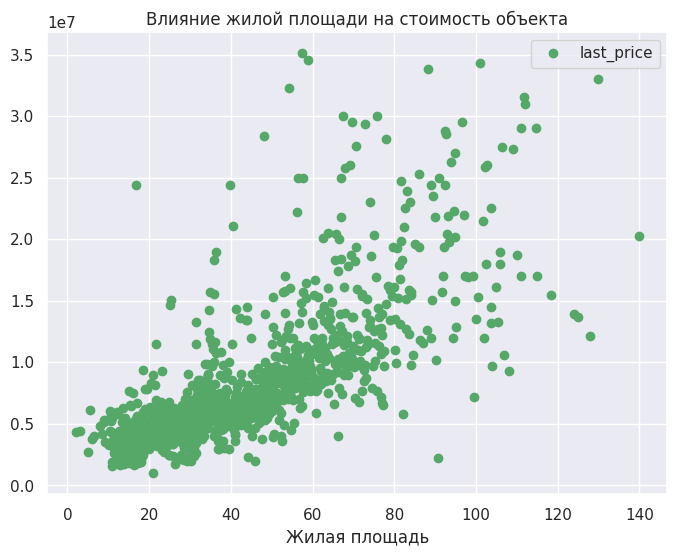

Корреляция цены объекта и жилой площади:

             living_area  last_price
living_area     1.000000    0.638017
last_price      0.638017    1.000000


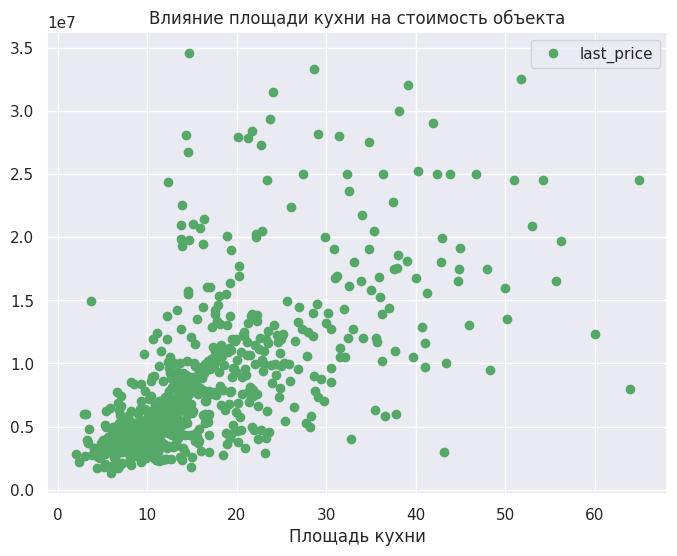

Корреляция цены объекта и площади кухни:

              kitchen_area  last_price
kitchen_area      1.000000    0.575466
last_price        0.575466    1.000000


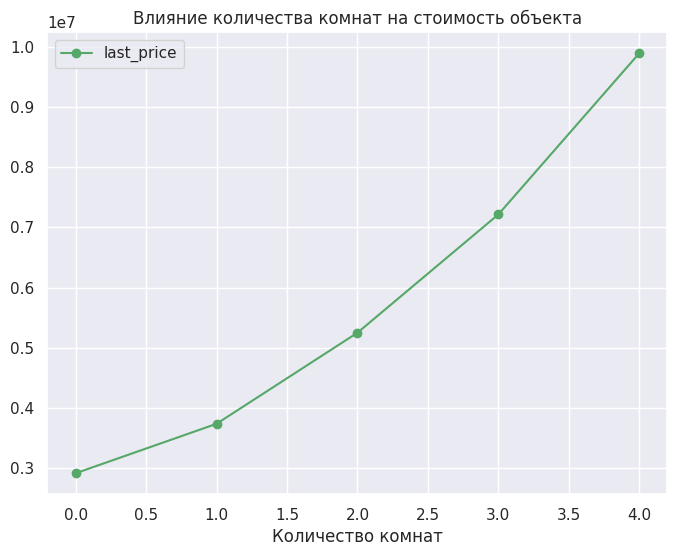

Корреляция цены объекта и количсетва комнат:

               rooms  last_price
rooms       1.000000    0.450168
last_price  0.450168    1.000000


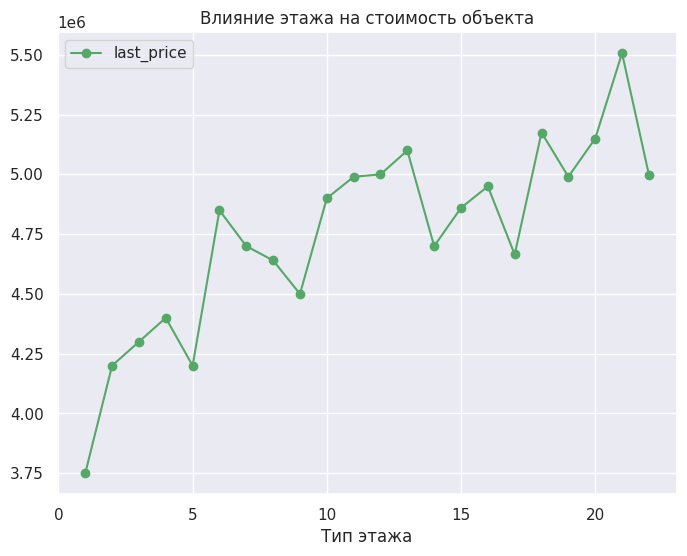

Корреляция цены объекта и количсетва комнат:

               floor  last_price
floor       1.000000    0.103224
last_price  0.103224    1.000000


In [48]:

#Влияние общей площади объекта на стоимость объекта
(data.pivot_table(index='total_area', values='last_price')
     .plot(grid=True, style='o', figsize=(8, 6), color='g'))
plt.title('Влияние общей площади объекта на стоимость объекта')
plt.xlabel('Общая площадь')
plt.show()
print('Корреляция цены объекта и общей площади:\n')
print(data[['total_area', 'last_price']].corr())

#Влияние жилой площади на стоимость объекта
(data.pivot_table(index='living_area', values='last_price')
     .plot(grid=True, style='o', figsize=(8, 6), color='g'))
plt.title('Влияние жилой площади на стоимость объекта')
plt.xlabel('Жилая площадь')
plt.show()
print('Корреляция цены объекта и жилой площади:\n')
print(data[['living_area', 'last_price']].corr())

#Влияние площади кухни на стоимость объекта
(data.pivot_table(index='kitchen_area', values='last_price')
     .plot(grid=True, style='o', figsize=(8, 6), color='g'))
plt.title('Влияние площади кухни на стоимость объекта')
plt.xlabel('Площадь кухни')
plt.show()
print('Корреляция цены объекта и площади кухни:\n')
print(data[['kitchen_area', 'last_price']].corr())

#Влияние количества комнат на стоимость объекта
(data.pivot_table(index='rooms', values='last_price')
     .plot(grid=True, style='o-', figsize=(8, 6), color='g'))
plt.title('Влияние количества комнат на стоимость объекта')
plt.xlabel('Количество комнат')
plt.show()
print('Корреляция цены объекта и количсетва комнат:\n')
print(data[['rooms', 'last_price']].corr())

#Влияние этажа объекта на стоимость объекта
(data.pivot_table(index='floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(8, 6), color='g'))
plt.title('Влияние этажа на стоимость объекта')
plt.xlabel('Тип этажа')
plt.show()
print('Корреляция цены объекта и количсетва комнат:\n')
print(data[['floor', 'last_price']].corr())


Построим графики зависимостей на дату размещения объявления. 

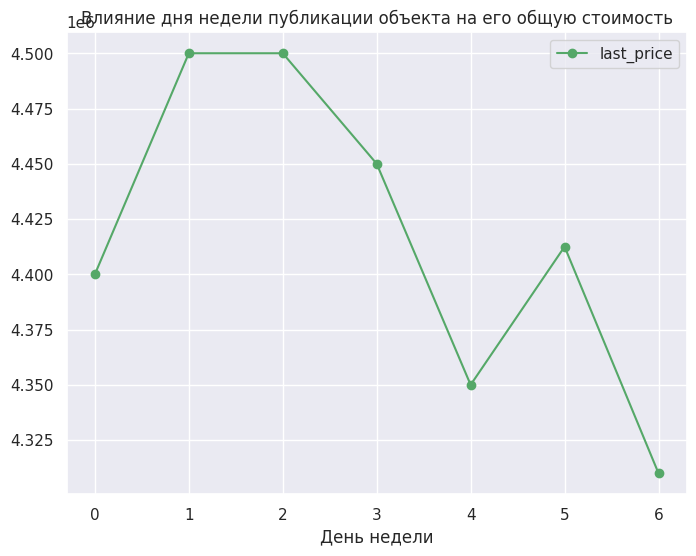

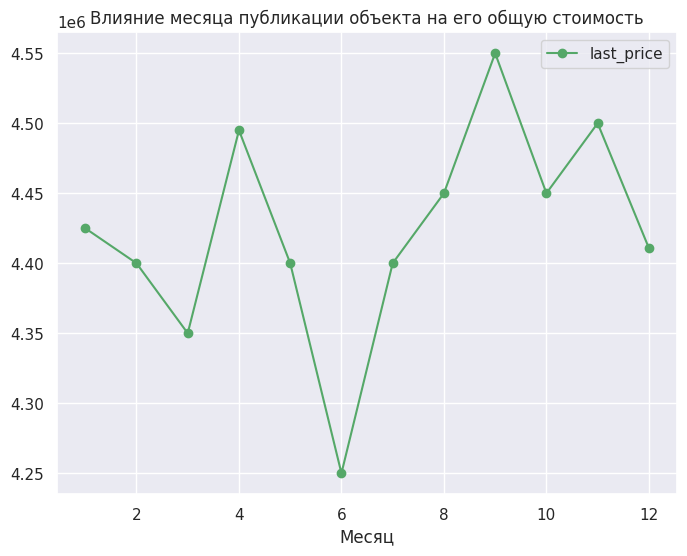

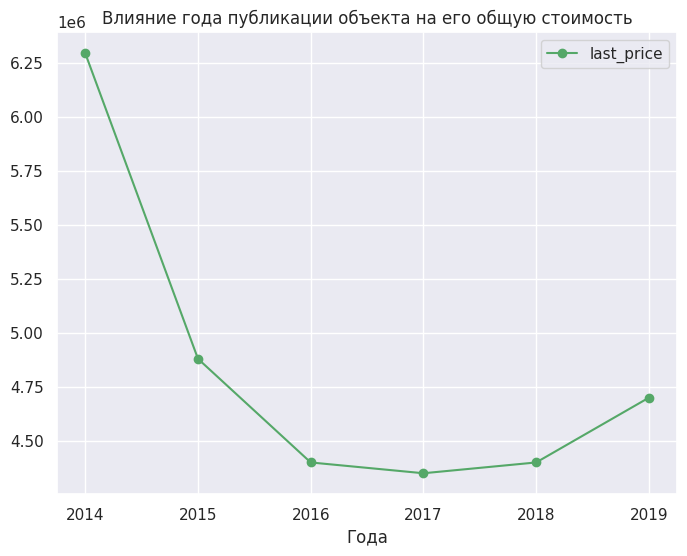

In [49]:
#Влияние дня недели публикации объекта на его общую стоимость
(data.pivot_table(index='day_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(8, 6), color='g'))
plt.title('Влияние дня недели публикации объекта на его общую стоимость')
plt.xlabel('День недели')
plt.show()

#Влияние месяца публикации объекта на его общую стоимость
(data.pivot_table(index='month_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(8, 6), color='g'))
plt.title('Влияние месяца публикации объекта на его общую стоимость')
plt.xlabel('Месяц')
plt.show()

#Влияние года публикации объекта на его общую стоимость
(data.pivot_table(index='year_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(8, 6), color='g'))
plt.title('Влияние года публикации объекта на его общую стоимость')
plt.xlabel('Года')
plt.show()

**Вывод**


**Площадь, жилая площадь, метраж кухни, количество комнат** напрямую влияет на общую стоимость объекта.Если эти показатели растут, но и общая стоимость объекта повышается. Есть малое проседание в графике по росту цены у объектов с комнатами более 9ти. Это очень маленький процент объектов в выборке, потому нельзя точно, что количество комнат более 9ти негативно влияет на рост цены.

Влияние **этажа**, на котором расположен объект на его стоимость очевидно. Негативно влияют 1е и последние этажи. Можно видеть заколы на графике как раз на последний этажа (5,9, 14,15 и т.д.). Как правильно на первых этажах есть свои проблемы (запах или сырость из подвала, опасность проникновения в дом, шум из подъезда) - не выигрышный вариант. На послдений этажах нет проблем таких, как на первых, но есть проблемы с подачей воды, особенно они ощутимы в домах с этажностью свыше 9-ти. 

По графикам можно заметить, что объекты в более высокой стоимостью размещались по вторникам. В летнее время для роста стоимости жилья создаются положительные условия в экономике - размещенные в июле объекты имеют стоимость выше, чем в другие месяцы года. По графике стоимости жилья с 2014 по 2019 можно увидеть сильный спад в стоимости между 2014 и 2015, затем до 2016 был еще один менее динамичный спад, далее через годовое плато стоимость жилья с 2017 по 2019 растет.


<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично

К сожалению тут тоже заимстоваванный код
    
Еще и с ошибкой. Зачем ты для расчета корреляции группируешь данные по этажу? Корреляцию надо считать по сырым данным
    
К тому исследование по старому брифу, список факторов для проверки различается
    
Данный пункт также надо переделать самостоятельно, анализируя те факторы, которые перечислены в брифе
    
Источник
    
http://ikunin.ru/analysis/spb_realestate_analyst/    
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Исправлено

</div>

#### 4. Расчет средней стоимости квадратного метра в топ-10 населенных пунктах

In [50]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_cost_per_sqm = data.query('locality_name in (@city_ten.index)').pivot_table(values='cost_per_sqm', index='locality_name')
city_cost_per_sqm = city_cost_per_sqm.astype(int)
city_cost_per_sqm.sort_values('cost_per_sqm', ascending=False)

,cost_per_sqm
locality_name,
санкт-петербург,108717
пушкин,101475
деревня кудрово,94572
поселок мурино,85929
поселок парголово,85537
поселок шушары,78333
колпино,74619
всеволожск,68465
гатчина,67848


**Вывод**

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и, непосредственно, к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также, небольшой по численности населения, Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1
Отлично

Расчеты верны, но можно добавить визуализаций
    
И, чтобы не находить отдельно топ-10 можно сделать одну сводную таблицу с двумя агрегирующими функциями, считающими количество объявлений и среднюю цену
    
Рекомендую почитать про сводные таблицы тут, и вообще ресурс отличный, кидай его в закладки
    
http://dfedorov.spb.ru/pandas/%D0%A1%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%20pandas.html
    
</div>

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Спасибо!

</div>

#### 5. Анализ изменения стоимости по степени удаленности объектов от центра СПб

Выделим квартиры в Санкт Петербурге в отдельную таблицу. 
Построим график стоимости цен по удаленности от центра.

Text(0, 0.5, 'Средняя стоимость за кв.м.')

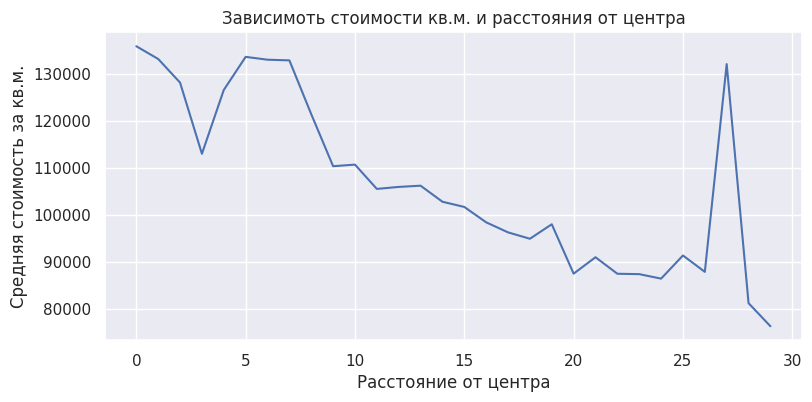

In [51]:
data_spb = data.query('locality_name == "санкт-петербург"')
pd.set_option('chained_assignment', None)
data_spb.groupby('city_center_km')['cost_per_sqm'].mean().plot(grid=True, figsize=(9,4))
plt.title('Зависимоть стоимости кв.м. и расстояния от центра')
plt.xlabel('Расстояние от центра')
plt.ylabel('Средняя стоимость за кв.м.')

Как и предполагалось, чем дальше объект от центра, тем ниже его стоимость и наоборот.

Есть объекты на удалении от центра на 30 км - самые дальние и близжайшие - 0 км.

Есть всплеск на 27 км. Посмотрим, что это за объекты.

In [52]:
data_spb[data_spb['city_center_km'] == 27].sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,day_publication,month_publication,year_publication,floor_type,city_center_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496,0,<NA>,128,193918.918919,1,11,2017,другой,27
5961,6,2250000,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,<NA>,0,<NA>,178,70312.5,1,2,2018,последний,27


Это аномальное значение, так как на один квадратный метр в столь удаленном от центра месте не может быть такая стоимость. Удаляем и повторно строим график без этого значения.

Text(0, 0.5, 'Средняя стоимость за кв.м.')

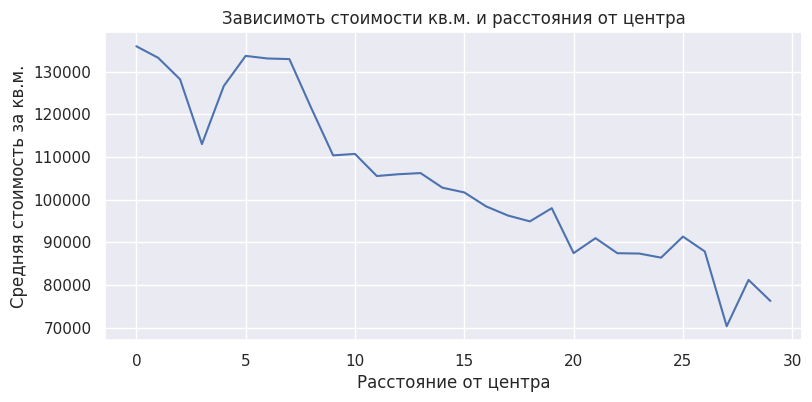

In [53]:
data_spb = data_spb.drop(index=748)

#строим график
data_spb.groupby('city_center_km')['cost_per_sqm'].mean().plot(grid=True, figsize=(9,4))
plt.title('Зависимоть стоимости кв.м. и расстояния от центра')
plt.xlabel('Расстояние от центра')
plt.ylabel('Средняя стоимость за кв.м.')

**Вывод**

Средняя стоимость за кв.м. зависит от удаленности от центра. Чем ближе, тем выше стоимость, соотвественно, чем дальше от центра, тем меньше стоимость.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1
Отлично

График и расчеты верны, но было бы хорошо выделить центральную границу СПБ по графику
    
И будет хорошей практикой давать название графику и подписывать оси. 
    
```python
plt.title('name')
plt.xlabel('x_name')
plt.ylabel('y_name')
```
    
</div>

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера v_1
Критично

На графике и таблице выше следовало остановиться. Ты уже посчитала среднюю цену для каждого км
    
Не совсем понятно, что происходит в расчетах ниже
    
Ты от средней цены каждого км отнимаешь среднюю цену 30 км
    
А потом еще и делишь эту сумму на сумму по колонке с расстояними
    
Расчеты ниже следует убрать из проекта, они некорректны. Достаточно оставить график
</div>
    

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Исправлено

</div>

### 5. Общий вывод

В ходе ислледования была обработана информация о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В процессе обработки были устранены некоторые пропущенные значения, исключены редкие и выбивающиеся значения.

В результате получен ряд выводов:
- В среднем объекты продаются за срок до 100 дней. Есть объекты, которые были проданы за 1 день и есть объекты, которые ожидали продажи более 4х лет (1580 дней самая долгая продажа в выборке). Быстрой продажей можно обозначить срок реализации 45 дней и менее. Длительная продажа - от 230 дней (~7,5 месяцев) и более.
- Самые продаваемые квартиры находятся не на первом и последнем этажах, и это, как правило, 1 комнатные квартиры. Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.
- Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и, непосредственно, к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также, небольшой по численности населения, Выборг, расположенный на большом расстоянии от Санкт-Петербурга.
- Средняя стоимость за кв.м. зависит от расстояния до центра. Чем ближе, тем выше стоимость, соотвественно, чем дальше от центра, тем меньше стоимость.


<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_1
Отлично

С выводом все ОК 👍🏻

</div>

<div class="alert alert-block alert-info">

### Комментарий студента:
    
    Спасибо за вашу работу! 

</div>

### **Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод